In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error


In [2]:

from afinn import Afinn
afinn = Afinn()


In [3]:
df = pd.read_csv('/Users/varsha/.spyder-py3/Nelson.csv')

df.head(3)

,tweet,Created-At,From-User,Retweet-Count,Account,Id
0,Rick Scott on Twitter: &quot;.@SenBillNelson h...,2018-10-22 15:56:54,Rick Scott,289.0,Nelson,1.054462e+18
1,Fox News on Twitter: &quot;Former Vice Preside...,2018-10-22 12:52:36,Fox News,70.0,Nelson,1.054415e+18
2,Rick Scott on Twitter: &quot;The difference be...,2018-10-21 17:34:02,Rick Scott,325.0,Nelson,1.054124e+18


In [4]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(text) for text in df.tweet]
df['afinn'] = afinn_scores


In [5]:

#compute sentiment scores (polarity) and labels
sentiment_scores = [afinn.score(text) for text in df.tweet]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]


In [6]:
df1 = pd.DataFrame([list(df['tweet']), sentiment_scores, sentiment_category]).T
df1.columns = ['tweet', 'sentiment_scores', 'sentiment_category']
df1['sentiment_scores'] = df1.sentiment_scores.astype('float')
df1.groupby(by=['tweet']).describe()


sentiment_scores        \
                                                              count  mean   
tweet                                                                       
#FloridaVoters \nVOTE for @SenBillNelson!\nThe ...              1.0  -4.0   
#TrumpIsNotAboveTheLaw grandmother-sweets on Tw...              1.0   4.0   
(((TheRReport))) on Twitter: &quot;It&#39;s 2 p...              1.0  -2.0   
.@ScottforFlorida is as crooked as they come. K...              1.0   0.0   
?? ?? on Twitter: &quot;There is no state incom...              1.0  -1.0   
?? ?? on Twitter: &quot;Well, then you either r...              1.0  -2.0   
???????? Only4RM ???????? on Twitter: &quot;Yes...              1.0   1.0   
????Christine???? on Twitter: &quot;Good luck. ...              1.0   6.0   
????MAGA ~ #DeSantisNunezWINFlorida!!!???? on T...              1.0   2.0   
????MAGA ~ #DeSantisNunezWINFlorida!!!???? on T...              1.0   0.0   
????️Monica???? on Twitter: &quot;FLORIDIANS, y...              1.0   2.0   
??AmberSherry?? on Twitter: &quot;I&#39;m worki...              1.0   3.0   
??AmberSherry?? on Twitter: &quot;Last I checke...              1.0   2.0   
??AmberSherry?? on Twitter: &quot;Oh there&#39;...              1.0   3.0   
??Kayla??✈?????????? on Twitter: &quot;Lib medi...              1.0   1.0   
??Kayla??✈?????????? on Twitter: &quot;Not only...              1.0  -4.0   
??Kent B #Resist #JailTrump?? on Twitter: &quot...              1.0   2.0   
??MadamePresident?? on Twitter: &quot;You&#39;r...              1.0   3.0   
??MayBay???????? on Twitter: &quot;Hatin’ trump...              1.0   0.0   
??Sharon Wants #JusticeFor2016 ~ Soros Soldier ...              1.0   0.0   
??jane?? on Twitter: &quot;WTH?  I really disli...              1.0  -4.0   
@10MinutesaDay4U: Florida! Healthcare is on the...             39.0   0.0   
@1SKERKRO: RICKSCOTT IS A BAD INVESTMENT \n\nNO...              7.0  -3.0   
@1SKERKRO: RickScott is a bad investment\n\nNot...              4.0 -12.0   
@1SKERKRO: WE MUST STEP UP & VOTE FOR @NelsonFo...              6.0   2.0   
@1_Hoof_Hearted: @clairecmc #DrainTheSwamp\n\n@...              2.0   0.0   
@5141quid: @EdKrassen @Jaysims27 @SenBillNelson...              2.0   0.0   
@AdamsFlaFan on Twitter: &quot;New report: Flor...              1.0  -2.0   
@AlFresco2020: @WalkerForFL @ScottforFlorida @S...              1.0   0.0   
@AmberMorseJaco1 @HeidiHeitkamp @SenBillNelson ...              1.0   4.0   
...                                                             ...   ...   
gb on Twitter: &quot;FLORIDA VOTERS!! Rick Scot...              1.0  -1.0   
ginny⭐️⭐️⭐️???????????? on Twitter: &quot;1972 ...              1.0   3.0   
jackie call on Twitter: &quot;Puma. Able to bri...              1.0   4.0   
jc5502 on Twitter: &quot;Jacksonville, FL&#10;A...              1.0   0.0   
kwabbena Lucky on Twitter: &quot;# Vote Blue No...              1.0   3.0   
lauren on Twitter: &quot;You forgot to add, wan...              1.0  -2.0   
linda bertinelli on Twitter: &quot;FLORIDA! NO ...              1.0  -3.0   
mayor alex penelas on Twitter: &quot;Firing up ...              1.0  -2.0   
mblinhart on Twitter: &quot;Nope, not supportin...              1.0   1.0   
mblinhart on Twitter: &quot;Or Claire McGaskill...              1.0   0.0   
miles reed on Twitter: &quot;… &quot;                           1.0   0.0   
quid on Twitter: &quot;#RickScott has already p...              1.0   2.0   
rachel miller on Twitter: &quot;Not gonna happe...              1.0   0.0   
rcherenson on Twitter: &quot;Don’t forget @sena...              1.0  -1.0   
rcherenson on Twitter: &quot;I hope so! And hop...              1.0   8.0   
rcherenson on Twitter: &quot;Palm Beach County,...              1.0   0.0   
sandra henson on Twitter: &quot;Just saw on CNN...              1.0   6.0   
spencer tullis on Twitter: &quot;I blocked him…...              1.0  -1.0   
spencer tullis on Twitter: &quot;These bots are

In [7]:

#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df1.groupby("sentiment_scores")["tweet"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["TextClean"] = cluster1["tweet"].apply(cleanReviews)



In [8]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [9]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
        

In [10]:
df1["sentiment_category"].describe()

count         6574
unique           3
top       positive
freq          4376
Name: sentiment_category, dtype: object

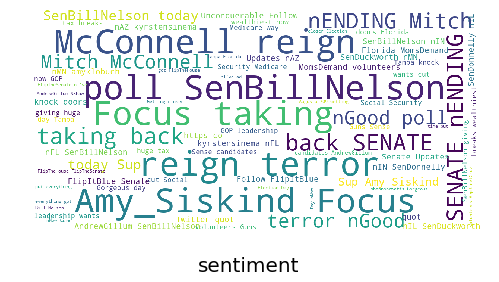

In [11]:
#Wordcloud on unclean data       
#category 0
show_wordcloud(cluster['tweet'][0], title ="sentiment")    
    

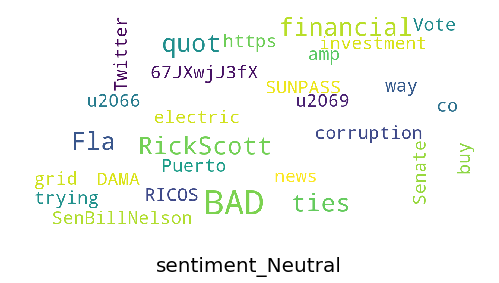

In [12]:
#Wordcloud on cleaned data      
#category 0
show_wordcloud(cluster1['tweet'][0], title ="sentiment_Neutral")    
    

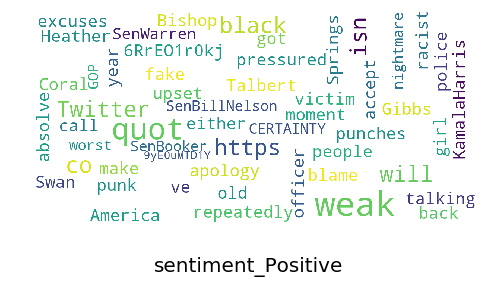

In [13]:
show_wordcloud(cluster1['tweet'][1], title ="sentiment_Positive")    
    

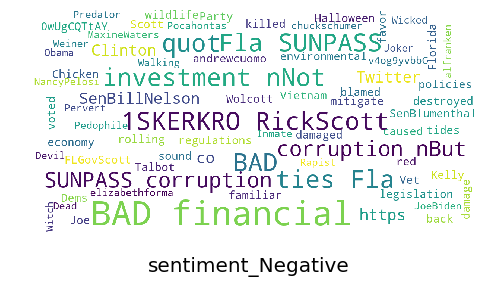

In [14]:
show_wordcloud(cluster1['tweet'][2], title ="sentiment_Negative")    
    

In [15]:
df1["sentiment_category"].unique()

array(['negative', 'neutral', 'positive'], dtype=object)